# Evaluation of the Results for unknown CPs #
Notebook from https://github.com/ermshaua/time-series-segmentation-benchmark/blob/main/tssb/notebooks/competitor_evaluation.ipynb. Slightly edited.

In [13]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

Let's load the scores from the different methods.

In [14]:
df_scores = pd.read_csv("./segmentation_covering_unknown_stumpy.csv")
df_scores

,dataset,ESPRESSO,BOCD,Window,PELT,BinSeg,FLOSS,ClaSP,fluss1,fluss2,fluss3,fluss4,fluss5
0,Adiac,0.408,0.303,0.303,0.303,0.303,0.809,0.816,0.430398,0.479403,0.551136,0.302734,0.302734
1,ArrowHead,0.701,0.483,0.500,0.500,0.500,0.995,0.996,0.994702,0.500000,0.500000,0.500000,0.500000
2,Beef,0.487,0.344,0.500,0.500,0.500,0.935,0.848,0.935417,0.936750,0.939422,0.935417,0.938085
3,BeetleFly,0.656,0.716,0.500,0.500,0.500,0.500,1.000,0.500000,0.500000,0.500000,0.500000,0.500000
4,BirdChicken,0.459,0.366,0.500,0.500,0.500,0.500,0.500,0.500000,0.500000,0.500000,0.500000,0.500000
5,CBF,0.505,0.613,0.342,0.342,0.342,0.861,0.680,0.256156,0.256156,0.256156,0.256156,0.256156
6,Car,0.339,0.256,0.256,0.256,0.256,0.256,0.761,0.861173,0.868268,0.837818,0.799780,0.937797
7,Chinatown,0.367,1.000,1.000,1.000,1.000,0.704,1.000,0.704167,1.000000,1.000000,1.000000,1.000000
8,ChlorineConcentration,0.398,0.664,0.577,0.577,0.577,0.577,0.577,0.577487,0.577487,0.577487,0.577487,0.577487
9,CinCECGTorso,0.496,0.551,0.337,0.337,0.337,0.337,0.828,0.337149,0.337149,0.337149,0.337149,0.337149


Let's calculate the mean/median/std error.

In [15]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean() * 100, 2)}")

ESPRESSO: mean_error=44.36
BOCD: mean_error=44.88
Window: mean_error=40.1
PELT: mean_error=58.1
BinSeg: mean_error=57.49
FLOSS: mean_error=56.74
ClaSP: mean_error=85.47
fluss1: mean_error=53.45
fluss2: mean_error=48.77
fluss3: mean_error=46.75
fluss4: mean_error=43.8
fluss5: mean_error=43.16


In [16]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].median() * 100, 2)}")

ESPRESSO: mean_error=43.2
BOCD: mean_error=40.1
Window: mean_error=34.2
PELT: mean_error=50.4
BinSeg: mean_error=50.4
FLOSS: mean_error=54.9
ClaSP: mean_error=96.3
fluss1: mean_error=50.1
fluss2: mean_error=50.0
fluss3: mean_error=50.0
fluss4: mean_error=36.52
fluss5: mean_error=34.22


In [17]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std() * 100, 2)}")

ESPRESSO: std_error=15.51
BOCD: std_error=20.25
Window: std_error=22.89
PELT: std_error=24.74
BinSeg: std_error=25.64
FLOSS: std_error=25.22
ClaSP: std_error=18.84
fluss1: std_error=24.84
fluss2: std_error=25.55
fluss3: std_error=26.1
fluss4: std_error=24.92
fluss5: std_error=25.84


Let's compute the wins per method.

In [18]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/tmp/ipykernel_25286/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [19]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

ESPRESSO:wins=4 rank=6.8
BOCD:wins=6 rank=6.7
Window:wins=7 rank=6.8
PELT:wins=12 rank=4.7
BinSeg:wins=12 rank=4.4
FLOSS:wins=9 rank=4.6
ClaSP:wins=49 rank=2.1
fluss1:wins=7 rank=4.8
fluss2:wins=8 rank=5.1
fluss3:wins=10 rank=5.4
fluss4:wins=7 rank=5.9
fluss5:wins=9 rank=5.9


Let's plot and output the ranks.

In [20]:
# cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
# Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, width=5, reverse=True, textspace=1.2, filename="../ranks.png")

# compute_CD not working with newest Orange version

In [21]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f"{name}: rank={np.round(rank, 5)}")

ESPRESSO: rank=6.78667
BOCD: rank=6.68
Window: rank=6.78667
PELT: rank=4.66667
BinSeg: rank=4.42667
FLOSS: rank=4.58667
ClaSP: rank=2.09333
fluss1: rank=4.8
fluss2: rank=5.14667
fluss3: rank=5.41333
fluss4: rank=5.88
fluss5: rank=5.92


Let's compute wins/losses against the best-ranking algorithm ClaSP.

In [22]:
for rival in df_scores.columns[1:]:
    if rival == "ClaSP": continue
    
    df_pair = df_scores[["ClaSP", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["ClaSP"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"ClaSP vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

ClaSP vs ESPRESSO: (wins/losses/ties): 7/68/0
ClaSP vs BOCD: (wins/losses/ties): 5/65/5
ClaSP vs Window: (wins/losses/ties): 0/60/15
ClaSP vs PELT: (wins/losses/ties): 7/56/12
ClaSP vs BinSeg: (wins/losses/ties): 7/56/12
ClaSP vs FLOSS: (wins/losses/ties): 9/53/13
ClaSP vs fluss1: (wins/losses/ties): 11/59/5
ClaSP vs fluss2: (wins/losses/ties): 9/60/6
ClaSP vs fluss3: (wins/losses/ties): 11/58/6
ClaSP vs fluss4: (wins/losses/ties): 7/62/6
ClaSP vs fluss5: (wins/losses/ties): 9/60/6


Let's compute wins/losses against the stumpy fluss algorithm (no dilation).

In [23]:
for rival in df_scores.columns[1:]:
    if rival == "fluss1": continue
    
    df_pair = df_scores[["fluss1", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["fluss1"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"fluss1 vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

fluss1 vs ESPRESSO: (wins/losses/ties): 29/46/0
fluss1 vs BOCD: (wins/losses/ties): 30/45/0
fluss1 vs Window: (wins/losses/ties): 17/47/11
fluss1 vs PELT: (wins/losses/ties): 40/29/6
fluss1 vs BinSeg: (wins/losses/ties): 41/28/6
fluss1 vs FLOSS: (wins/losses/ties): 36/26/13
fluss1 vs ClaSP: (wins/losses/ties): 59/11/5
fluss1 vs fluss2: (wins/losses/ties): 14/20/41
fluss1 vs fluss3: (wins/losses/ties): 9/27/39
fluss1 vs fluss4: (wins/losses/ties): 4/30/41
fluss1 vs fluss5: (wins/losses/ties): 6/30/39


/tmp/ipykernel_25286/892647125.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/tmp/ipykernel_25286/892647125.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


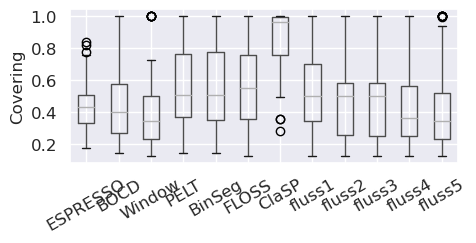

In [24]:
fontsize = 12
_, ax = plt.subplots(figsize=(5,2))

df_scores.boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"./boxplot_unknown.png", bbox_inches="tight")